# Project: Wrangling and Analyze Data

## Overview
WeRateDogs, @dog_rates, a Twitter account that rated dogs pictures with the participation of users with a humorous comment about the dog picture. People rated dogs with a denominator of 10 and a numerator usually above 15 points based on how cute is the dog. 

The aim of this project is to create an interesting and trustworthy analysis and visualizations about the datasets that will be gathered. Focusing on Data Wrangling, using Python libraries, gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, and cleaning the data. 

## Tools Used

Python version 3.9
The tools used are the following Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
1. twitter_archive was directly downloaded as a CSV file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Used the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests 
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# consumer_key = '???'
# consumer_secret = '???'
# access_token = '???-???'
# access_secret = '???'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# # Tweet IDs for which to gather additional data via Twitter's API
# # tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    
#     # This loop will take 20-30 minutes to run due to Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
# #             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
# Read tweet_json.txt 
tweet_json = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls. 

All these columns have a lot of missing values.

In [8]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670995969...,12,10,None,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
175,857989990357356544,NaN,NaN,2017-04-28 16:08:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She was just informed of the wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857989990...,12,10,Rosie,None,None,None,None
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,None,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None


In [9]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [10]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [12]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

> name, doggo, floofer, pupper, puppo columns have a lot of None values.

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> The max value is 170.

In [16]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.duplicated().sum()

0

In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> Seems that there is no duplicates or null values in image_predictions dataframe.

In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     242 non-null    datetime64[ns, UTC]
 1   id                             242 non-null    int64              
 2   id_str                         242 non-null    int64              
 3   full_text                      242 non-null    object             
 4   truncated                      242 non-null    bool               
 5   display_text_range             242 non-null    object             
 6   entities                       242 non-null    object             
 7   extended_entities              199 non-null    object             
 8   source                         242 non-null    object             
 9   in_reply_to_status_id          14 non-null     float64            
 10  in_reply_to_status_id_str 

> We should extract from tweet_jason just the columns that we need for the analysis.

In [22]:
# Selecting all data needed for tweet_jason dataframe
tweet_json_df = tweet_json[['id', 'retweet_count', 'favorite_count']]
tweet_json_df.head()


,id,retweet_count,favorite_count
0,892420643555336193,7066,34096
1,892177421306343426,5341,29587
2,891815181378084864,3510,22284
3,891689557279858688,7279,37263
4,891327558926688256,7810,35614


In [23]:
tweet_json_df.duplicated().sum()

0

In [24]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              242 non-null    int64
 1   retweet_count   242 non-null    int64
 2   favorite_count  242 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


> Rename tweet_json_df's id column. tweet_df = tweets_df.rename(columns={'id':'tweet_id'})

#### Quality issues
1. Dataframe twitter_archive: rating_numerator has wild rating numerators and might be replaced with 10. 
2. Dataframe twitter_archive: rating_denominator the rating denominator is 10. 
3. Dataframe twitter_archive: Extract the correct value for source column. 
4. Dataframe twitter_archive: Remove Retweets.
5. Dataframe twitter_archive: Drop unnecessary columns. Missing values in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
6. Dataframe twitter_archive: Changing the timestamp column to datetime type. 
7. Dataframe twitter_archive: Change the 'None' value in name column for null values. 
8. Dataframe image_predictions: Change text in p1, p2, and p3 columns. 

#### Tidiness issues
1. Dataframe twitter_archive: Create a Dog stage column where should be a single column rather than four: doggo, floofer, pupper, puppo.  
2. Dataframe tweet_json: Merge all dataframes as twitter_archive_master.  

## Cleaning Data

In [25]:
# making copies for all dataframes
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
tweet_json_cleaned = tweet_json_df.copy()

### Issue #1:

#### Define: 1. Dataframe twitter_archive: rating_numerator has wild rating numerators and might be replaced with 10.

#### Code

In [26]:
twitter_archive_cleaned['rating_numerator'].mask(twitter_archive_cleaned['rating_numerator'] > 10 , 10, inplace=True) 

#### Test

In [27]:
twitter_archive_cleaned.rating_numerator.value_counts()

10    1916
9      158
8      102
7       55
5       37
6       32
3       19
4       17
1        9
2        9
0        2
Name: rating_numerator, dtype: int64

### Issue #2: 

#### Define 2. Dataframe twitter_archive: rating_denominator the rating denominator is 10. 

Drop unnecessary columns. 

Missing values in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls. 

#### Code

In [28]:
twitter_archive_cleaned['rating_denominator'].mask(twitter_archive_cleaned['rating_denominator'] != 10 , 10, inplace=True)

#### Test

In [29]:
twitter_archive_cleaned['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #3: 
#### Define 3. Dataframe twitter_archive: Extract the correct value for source column. 

#### Code

In [30]:
# Extracting the correct text for source column
twitter_archive_cleaned['source'] = twitter_archive_cleaned['source'].str.extract('>(.*)<')

#### Test

In [31]:
twitter_archive_cleaned['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue#4:
#### Define 4. Dataframe twitter_archive: Remove Retweets. 

#### Code


In [32]:
# Dropping retweeted rows which are duplicates essentially
retweet_rows = twitter_archive_cleaned[twitter_archive_cleaned['retweeted_status_id'].notnull()].index
twitter_archive_cleaned = twitter_archive_cleaned.drop(retweet_rows, axis=0)

#### Test

In [33]:
twitter_archive_cleaned[twitter_archive_cleaned['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue#5:
#### Define 5. Dataframe twitter_archive: Drop unnecessary columns. Missing values in these columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls. 

#### Code

In [34]:
# Dropping unnecessary columns
twitter_archive_cleaned = twitter_archive_cleaned.drop(columns=['in_reply_to_status_id', 
                                                                'in_reply_to_user_id', 
                                                                'retweeted_status_id', 
                                                                'retweeted_status_user_id', 
                                                                'retweeted_status_timestamp',
                                                                'expanded_urls'])

#### Test

In [35]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #6:
#### Define 6. Dataframe twitter_archive: Changing the timestamp column to datetime type. 

#### Code

In [36]:
# Converting data type to datetime 
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned['timestamp'])

#### Test

In [37]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #7:
#### Define 7. Dataframe twitter_archive: Change the 'None' value in name column for null values. 

#### Code

In [38]:
# Replacing the "None" value for missing values in name column
twitter_archive_cleaned['name'].replace('None', np.nan, inplace=True)

#### Test

In [39]:
twitter_archive_cleaned[twitter_archive_cleaned['name']== "None"]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8:
#### Define 8. Dataframe image_predictions: Change text in p1, p2, and p3 columns. 

#### Code

In [40]:
image_predictions_cleaned['p1'] = image_predictions_cleaned['p1'].str.replace('_', ' ').str.title()
image_predictions_cleaned['p2'] = image_predictions_cleaned['p2'].str.replace('_', ' ').str.title()
image_predictions_cleaned['p3'] = image_predictions_cleaned['p3'].str.replace('_', ' ').str.title()

#### Test

In [41]:
image_predictions_cleaned.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,Car Mirror,0.997121,False,Seat Belt,0.000375,False,Beagle,0.000216,True


### Issue #9:
#### Define 1. Dataframe twitter_archive: Create a Dog stage column where should be a single column rather than four: doggo, floofer, pupper, puppo.

#### Code

In [42]:
# Replacing 'None' values
twitter_archive_cleaned['doggo'].replace('None', '', inplace=True)
twitter_archive_cleaned['floofer'].replace('None', '', inplace=True)
twitter_archive_cleaned['pupper'].replace('None', '', inplace=True)
twitter_archive_cleaned['puppo'].replace('None', '', inplace=True)

# Extracting the dog type text variables from the columns: 'doggo', 'floofer', 'pupper', 'puppo'.

twitter_archive_cleaned.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

twitter_archive_cleaned['dog_stage'] = twitter_archive_cleaned['doggo'] + twitter_archive_cleaned['floofer'] + twitter_archive_cleaned['pupper'] + twitter_archive_cleaned['puppo']
twitter_archive_cleaned.loc[twitter_archive_cleaned['dog_stage'] == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_cleaned.loc[twitter_archive_cleaned['dog_stage'] == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_cleaned.loc[twitter_archive_cleaned['dog_stage'] == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [43]:
# Dropping columns
twitter_archive_cleaned = twitter_archive_cleaned.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [44]:
twitter_archive_cleaned['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Issue #10:
#### Define 2. Dataframe tweet_json: Merge all dataframes as twitter_archive_master.  

#### Code

In [45]:
# Merging 'twitter_archive_cleaned' and 'image_predictions_cleaned'
twitter_archive_m = pd.merge(twitter_archive_cleaned, image_predictions_cleaned, on = 'tweet_id', how = 'inner')

In [46]:
# Merging 'twitter_archive_m' and 'tweet_json_cleaned'
twitter_archive_master = pd.merge(twitter_archive_m, tweet_json_cleaned, left_on = 'tweet_id', right_on = 'id', how = 'left')

#### Test

In [47]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1448 non-null   object             
 7   dog_stage           1994 non-null   object             
 8   stage               11 non-null     object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   int64              
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

## Storing Data

In [48]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

### Insights:

1. What is the distribution of favorite_count, retweet_count, and source? 
2. Do favorite_count and retweet_count have any correlation? 
3. Which dog stage have more engagement in terms of favorites and retweets? 
4. What are the best dog breed best rated? 

### Visualization
#### 1. What is the distribution of favorite_count, retweet_count, and source? 

Text(0.5, 1.0, 'Retweets Distribution')

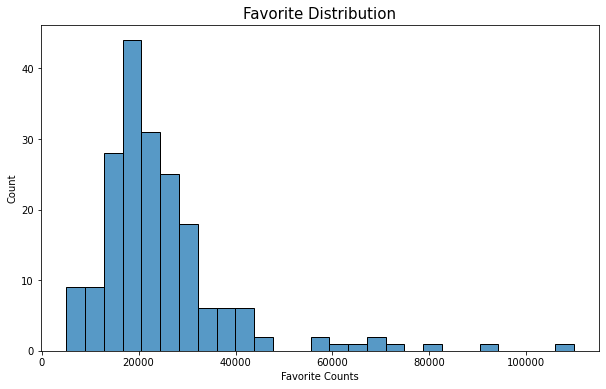

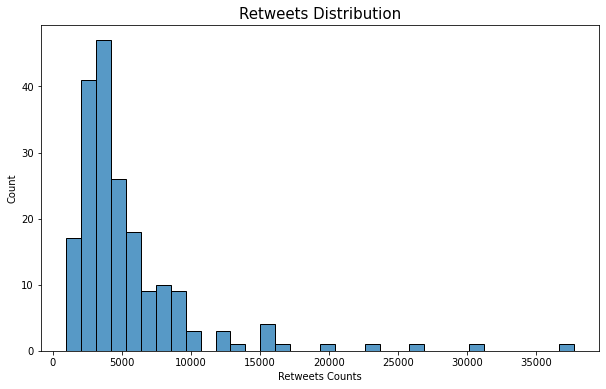

In [49]:
# Favorite and Retweet Distributions
plt.figure(figsize=(10,6))
sns.histplot(twitter_archive_master.favorite_count);
plt.xlabel("Favorite Counts")
plt.title("Favorite Distribution", size=15)
plt.figure(figsize=(10,6))
sns.histplot(twitter_archive_master.retweet_count);
plt.xlabel("Retweets Counts")
plt.title("Retweets Distribution", size=15)

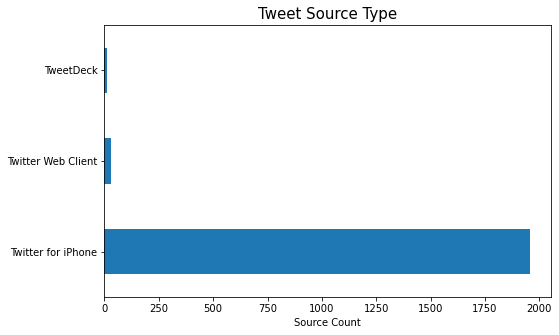

In [50]:
source = twitter_archive_master['source'].value_counts()
source
plt.figure(figsize=(8,5))
source.plot.barh()
plt.title("Tweet Source Type", size=15)
plt.xlabel("Source Count");

* favorite_count and retweet_count seems to have a pretty normal distribution. 
* The most common source is Twitter for Iphone

#### 2. Do favorite_count and retweet_count have any correlation? 

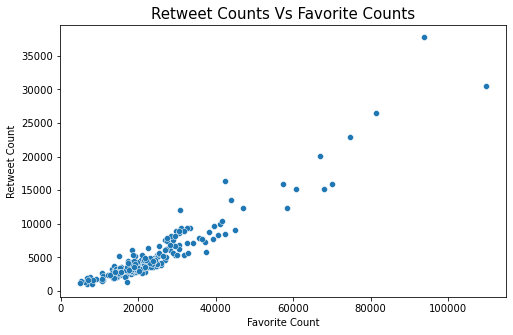

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='favorite_count', y='retweet_count', data=twitter_archive_master)
plt.title("Retweet Counts Vs Favorite Counts", size=15)
plt.ylabel("Retweet Count")
plt.xlabel("Favorite Count");

In [52]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.9442720166995859

* It is very clear that favorite_count and retweet_counts have a strong positive correlation.

#### 3. Which dog stage have more engagement in terms of favorites and retweets? 

Text(0.5, 1.0, 'Favorite and Retweet Count')

<Figure size 720x432 with 0 Axes>

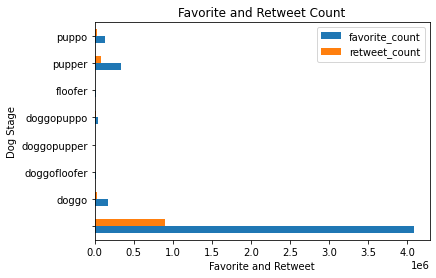

In [53]:
favorite_dogstage = twitter_archive_master.groupby(['dog_stage'])[['favorite_count', 'retweet_count']].sum()
plt.figure(figsize=(10,6))
favorite_dogstage.plot.barh()
plt.xlabel("Favorite and Retweet")
plt.ylabel("Dog Stage")
plt.title("Favorite and Retweet Count")

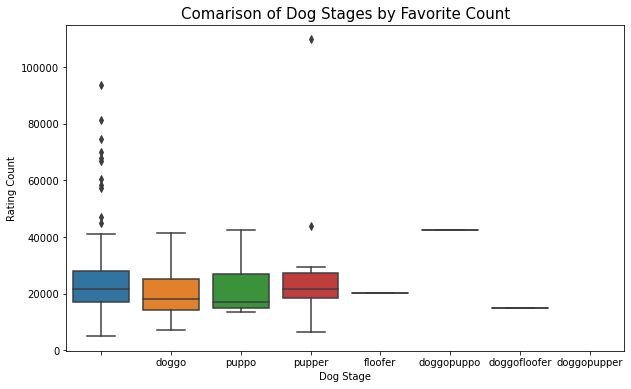

In [54]:
stage = twitter_archive_master[twitter_archive_master['dog_stage'].notnull()]
stage_rating = stage[['dog_stage', 'favorite_count']]

plt.figure(figsize=(10,6))
sns.boxplot(x="dog_stage", y="favorite_count", data=stage_rating)
plt.title("Comarison of Dog Stages by Favorite Count", size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Rating Count');

* Pupper is the dog stage best favorited, on second place we have puppo, on third place doggo, and finally floofer.

#### 4. What are the best dog breed best rated? 

In [55]:
# this function will clasiffy by dog breeds in a new column called 'dog_breed'
def breed_pred(row):
    '''This function clasifies dog breed by 1st, 2nd or 3rd prediction'''
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

twitter_archive_master['dog_breed'] = twitter_archive_master.apply(breed_pred, axis = 1)

In [56]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,stage,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,dog_breed
1113,698710712454139905,2016-02-14 03:29:49+00:00,Twitter for iPhone,This is Cuddles. He's not entirely sure how do...,10,10,Cuddles,,NaN,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,...,Shoji,0.165772,False,Prison,0.103596,False,NaN,NaN,NaN,Samoyed


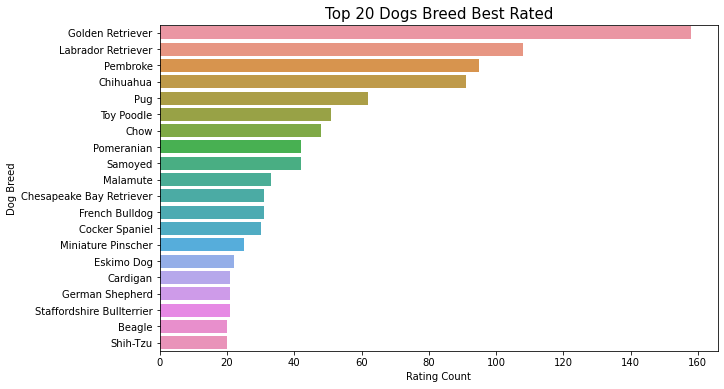

In [57]:
plt.figure(figsize=(10,6))
breed = twitter_archive_master.groupby(['dog_breed'], as_index=False)['rating_numerator'].count()
sns.barplot(x = 'rating_numerator', y = 'dog_breed', data=breed.nlargest(20, 'rating_numerator'))
plt.title("Top 20 Dogs Breed Best Rated", size=15)
plt.xlabel('Rating Count')
plt.ylabel('Dog Breed');

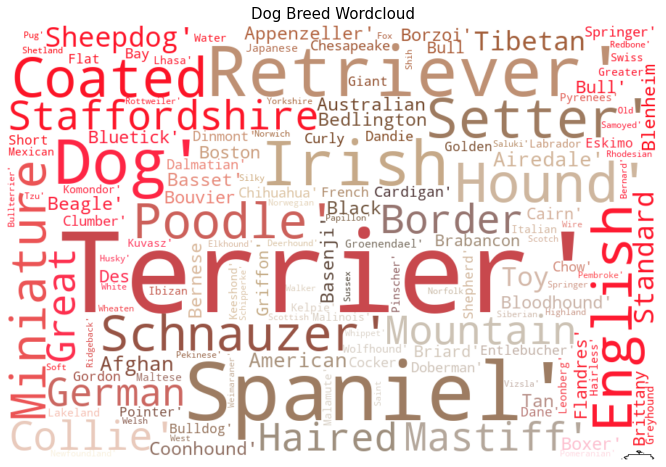

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import random

image_mask = np.array(Image.open('dog.jpeg'))
image_colors = ImageColorGenerator(image_mask)

text = (str(breed['dog_breed'].tolist()))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=1000,
                      mask=image_mask, width=1500, height=1200, contour_width=.01, 
                      contour_color='black', colormap = 'bone').generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors, random_state=3), interpolation='bilinear')
plt.title('Dog Breed Wordcloud', fontsize=15)
plt.axis('off');

* We can see that the golden retriever, labrador retriever, pembroke, chihuahua, are pug are top 5 best dog breed rated.

## Conclusion

A conclusion for this project and answering the questions for the @dog_rates data:

1. What is the distribution of favorite_count, retweet_count, and source?
* favorite_count and retweet_count seems to have a pretty normal distribution. 
* The most common source is Twitter for Iphone.

2. Do favorite_count and retweet_count have any correlation? 
* It is very clear that favorite_count and retweet_counts have a positive correlation.

3. Which dog stage have more engagement in terms of favorites and retweets?
* Pupper is the dog stage best rated, on second place we have puppo, on third place doggo, and finally floofer.

4. What are the best dog breed best rated? 
* We can see that the golden retriever, labrador retriever, pembroke, chihuahua, are pug are top 5 best dog breed rated.